# Insurance fraud detection

# Data Dictionary

## Categorical Variables

- **Month**: *object*
  - Contains 3-letter abbreviations for the months of the year.
  - Indicates the months in which the accident occurred.

- **WeekOfMonth**: *int64*
  - Provides the week in the month the accident occurred.

- **DayOfWeek**: *object*
  - Contains days of the week.
  - Indicates the days of the week the accident occurred on.

- **Make**: *object*
  - Contains a list of 19 car manufacturers.

- **AccidentArea**: *object*
  - Classifies the area for the accident as "Urban" or "Rural".

- **DayOfWeekClaimed**: *object*
  - Contains the day of the week the claim was filed.
  - Also contains '0'; needs further investigation for missing data.

- **MonthClaimed**: *object*
  - Contains 3-letter abbreviations for the months of the year.
  - Contains '0'; needs further investigation for missing data.

- **WeekOfMonthClaimed**: *int64*
  - Contains weeks in the month that the claim is filed.

- **Sex**: *object*
  - Gender of the individual making the claim.
  - Binary data, convert to 1 or 0.

- **MaritalStatus**: *object*
  - Marital status of the individual making the claim.

- **Fault**: *object*
  - Categorization of who was deemed at fault.
  - Convert to binary, 1 or 0.

- **PolicyType**: *object*
  - Contains two pieces of information:
    - The type of insurance on the car (liability, all perils, collision).
    - Category of the vehicle (sport, sedan, utility).

- **VehicleCategory**: *object*
  - Contains the categorization of the vehicle (see PolicyType).

- **VehiclePrice**: *object*
  - Contains ranges for the value of the vehicle.
  - Replace ranges with the mean value of the range and convert to float.

- **PoliceReportFiled**: *object*
  - Indicates whether a police report was filed for the accident.
  - Convert to binary.

- **WitnessPresent**: *object*
  - Indicates whether a witness was present.
  - Convert to binary.

- **AgentType**: *object*
  - Classifies an agent who is handling the claim as internal vs external.
  - Convert to binary.

- **AddressChange_Claim**: *object*
  - Guess: time from claim was filed to when the person moved (i.e., filed an address change).
  - Replace each interval with the mean value of the range.

- **NumberOfCars**: *object*
  - Guess: number of cars involved in the accident OR the number of cars covered under the policy.
  - Replace each interval with the mean value of the range.

- **BasePolicy**: *object*
  - Type of insurance coverage (see PolicyType).

## Numeric Variables

- **Age**: *int64*
  - Ages of individuals making claims.
  - There is at least one individual with age 0; potential missing data.

- **Deductible**: *int64*
  - The deductible amount (integer values).

- **DriverRating**: *int64*
  - The scale is 1, 2, 3, 4.
  - The name DriverRating implies the data is ordinal; further investigation needed.

- **PolicyNumber**: *int64*
  - The masked policy number, appears to be the same as row number minus 1.

- **RepNumber**: *int64*
  - Rep number is an integer from 1 - 16.

- **FraudFound_P**: *int64*
  - Indicates whether the claim was fraudulent (1) or not (0); target variable.

- **Days_Policy_Accident**: *object*
  - Guess: the number of days between when the policy was purchased and the accident occurred.
  - Each value is a range of values; change these to be the mean of the range and make float.

- **Days_Policy_Claim**: *object*
  - Guess: the number of days that pass between the policy was purchased and the claim was filed.
  - Each value is a range; change these to be the mean of the ranges and make float.

- **PastNumberOfClaims**: *object*
  - Previous number of claims filed by the policy holder (or claimant?).

- **AgeOfVehicle**: *object*
  - Represents the age of the vehicle at the time of the accident.
  - Each value is a range of years; change these to be the mean of the ranges and make float.

- **AgeOfPolicyHolder**: *object*
  - Each value is a range of ages.
  - Change these to be the mean of the ranges and make float.

- **NumberOfSupplements**: *object*
  - Probably not the number of vitamins taken daily.
  - Not sure what a supplement is in insurance.

- **NumberOfSupplements**: *object*
  - Probably not the number of vitamins taken daily.
  - Not sure what a supplement is in insurance.

- **NumberOfSuppliments**: *object*
  - Probably not the number of vitamins taken daily.
  - Not sure what a supplement is in insurance.

- **NumberOfSuppliments**: *object*
  - Probably not the number of vitamins taken daily.
  - Not sure what a supplement is in insurance.
  
- **NumberOfSuppliments**: *object*
  - Probably not the number of vitamins taken daily.
  - Not sure what a supplement is in insurance.


In [2]:
import pandas as pd

file_path = 'fraud_oracle.csv'

# Load the dataset into a Pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to check if it's loaded correctly
df.head()


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [3]:
# Check unique values in the target variable
unique_values = df['FraudFound_P'].unique()
print("Unique values in the target variable (FraudFound_P):", unique_values)



Unique values in the target variable (FraudFound_P): [0 1]


In [4]:
# Check for NaN values in the entire dataset
nan_values = df.isna().sum()
print("\nNaN values in the dataset:")
print(nan_values)



NaN values in the dataset:
Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64


Hence there are no missing values in the dataset

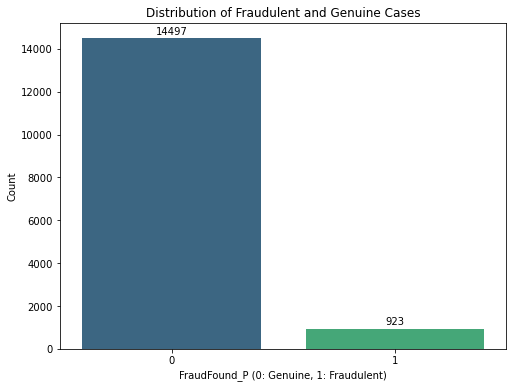

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of 0s and 1s in the target variable
fraud_counts = df['FraudFound_P'].value_counts()

# Plot the counts using a bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='FraudFound_P', data=df, palette='viridis')

# Annotate the bars with counts
for i, count in enumerate(fraud_counts):
    plt.text(i, count + 100, str(count), ha='center', va='bottom')

plt.title('Distribution of Fraudulent and Genuine Cases')
plt.xlabel('FraudFound_P (0: Genuine, 1: Fraudulent)')
plt.ylabel('Count')
plt.show()


In [6]:
# Display the data types of each column
data_types = df.dtypes
print("Data types of each column:")
print(data_types)


Data types of each column:
Month                   object
WeekOfMonth              int64
DayOfWeek               object
Make                    object
AccidentArea            object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Sex                     object
MaritalStatus           object
Age                      int64
Fault                   object
PolicyType              object
VehicleCategory         object
VehiclePrice            object
FraudFound_P             int64
PolicyNumber             int64
RepNumber                int64
Deductible               int64
DriverRating             int64
Days_Policy_Accident    object
Days_Policy_Claim       object
PastNumberOfClaims      object
AgeOfVehicle            object
AgeOfPolicyHolder       object
PoliceReportFiled       object
WitnessPresent          object
AgentType               object
NumberOfSuppliments     object
AddressChange_Claim     object
NumberOfCars            object
Year        

In [7]:
# Display unique values of each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f"\nUnique values in '{column}':")
    print(unique_values)



Unique values in 'Month':
['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Nov' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep']

Unique values in 'WeekOfMonth':
[5 3 2 4 1]

Unique values in 'DayOfWeek':
['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday']

Unique values in 'Make':
['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']

Unique values in 'AccidentArea':
['Urban' 'Rural']

Unique values in 'DayOfWeekClaimed':
['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0']

Unique values in 'MonthClaimed':
['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct'
 '0']

Unique values in 'WeekOfMonthClaimed':
[1 4 2 3 5]

Unique values in 'Sex':
['Female' 'Male']

Unique values in 'MaritalStatus':
['Single' 'Married' 'Widow' 'Divorced']

Unique values in 'Age':
[21 34 47 65 27 20 36  0 30 42 71 52 28 61 38 41 32 40 63 31 45 60 39 55
 35 44 7

In [8]:
# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=[
    'Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
    'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
    'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident',
    'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
    'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent',
    'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim',
    'NumberOfCars', 'BasePolicy'
], drop_first=True)

# Display the first few rows of the encoded DataFrame
df_encoded.head()


,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year,Month_Aug,...,AddressChange_Claim_2 to 3 years,AddressChange_Claim_4 to 8 years,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,BasePolicy_Collision,BasePolicy_Liability
0,5,1,21,0,1,12,300,1,1994,0,...,0,0,0,0,0,1,0,0,0,1
1,3,4,34,0,2,15,400,4,1994,0,...,0,0,1,0,0,0,0,0,1,0
2,5,2,47,0,3,7,400,3,1994,0,...,0,0,1,0,0,0,0,0,1,0
3,2,1,65,0,4,4,400,2,1994,0,...,0,0,1,0,0,0,0,0,0,1
4,5,2,27,0,5,3,400,1,1994,0,...,0,0,1,0,0,0,0,0,1,0


In [9]:
df_encoded

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year,Month_Aug,...,AddressChange_Claim_2 to 3 years,AddressChange_Claim_4 to 8 years,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,BasePolicy_Collision,BasePolicy_Liability
0,5,1,21,0,1,12,300,1,1994,0,...,0,0,0,0,0,1,0,0,0,1
1,3,4,34,0,2,15,400,4,1994,0,...,0,0,1,0,0,0,0,0,1,0
2,5,2,47,0,3,7,400,3,1994,0,...,0,0,1,0,0,0,0,0,1,0
3,2,1,65,0,4,4,400,2,1994,0,...,0,0,1,0,0,0,0,0,0,1
4,5,2,27,0,5,3,400,1,1994,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,4,5,35,1,15416,5,400,4,1996,0,...,0,0,1,0,0,0,0,0,1,0
15416,5,1,30,0,15417,11,400,3,1996,0,...,0,0,1,0,0,1,0,0,0,1
15417,5,1,24,1,15418,4,400,4,1996,0,...,0,0,1,0,0,0,0,0,1,0
15418,1,2,34,0,15419,6,400,4,1996,0,...,0,0,1,0,0,0,0,0,0,0


In [10]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df_encoded.drop('FraudFound_P', axis=1)
y = df_encoded['FraudFound_P']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (10794, 124)
Shape of X_test: (4626, 124)
Shape of y_train: (10794,)
Shape of y_test: (4626,)


In [11]:
# Check for missing values in the training set
missing_values_train = X_train.isnull().sum()
print("Missing values in the training set:")
print(missing_values_train)


Missing values in the training set:
WeekOfMonth                 0
WeekOfMonthClaimed          0
Age                         0
PolicyNumber                0
RepNumber                   0
                           ..
NumberOfCars_3 to 4         0
NumberOfCars_5 to 8         0
NumberOfCars_more than 8    0
BasePolicy_Collision        0
BasePolicy_Liability        0
Length: 124, dtype: int64


## Random forest

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import pandas as pd



# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Train the model on the training set
random_forest_model.fit(X_train, y_train)

# Predictions on the testing set
y_pred = random_forest_model.predict(X_test)

# Calculate AUC score
y_pred_proba = random_forest_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display evaluation metrics
print("Accuracy:", accuracy)
print("\nAUC Score:", auc_score)
print("\nClassification Report:")
print(classification_report_result)
print("\nConfusion Matrix:")
print(conf_matrix)


Accuracy: 0.9364461738002594

AUC Score: 0.8486467430578877

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2887
           1       1.00      0.01      0.01       197

    accuracy                           0.94      3084
   macro avg       0.97      0.50      0.49      3084
weighted avg       0.94      0.94      0.91      3084


Confusion Matrix:
[[2887    0]
 [ 196    1]]


## Random forest with SMOTE

In [13]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the Random Forest model
random_forest_model_smote = RandomForestClassifier(random_state=42)

# Train the model on the resampled training set
random_forest_model_smote.fit(X_train_resampled, y_train_resampled)

# Predictions on the testing set
y_pred_smote = random_forest_model_smote.predict(X_test)

# Calculate AUC score for SMOTE model
y_pred_proba_smote = random_forest_model_smote.predict_proba(X_test)[:, 1]
auc_score_smote = roc_auc_score(y_test, y_pred_proba_smote)

# Evaluate the SMOTE model
accuracy_smote = accuracy_score(y_test, y_pred_smote)
classification_report_result_smote = classification_report(y_test, y_pred_smote)
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)

# Display evaluation metrics for SMOTE model
print("Accuracy with SMOTE:", accuracy_smote)
print("\nAUC Score with SMOTE:", auc_score_smote)
print("\nClassification Report with SMOTE:")
print(classification_report_result_smote)
print("\nConfusion Matrix with SMOTE:")
print(conf_matrix_smote)


Accuracy with SMOTE: 0.9341763942931258

AUC Score with SMOTE: 0.8138847520567432

Classification Report with SMOTE:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2887
           1       0.00      0.00      0.00       197

    accuracy                           0.93      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.88      0.93      0.90      3084


Confusion Matrix with SMOTE:
[[2881    6]
 [ 197    0]]


## XGBoost

In [ ]:
import xgboost as xgb

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model on the training set
xgb_model.fit(X_train, y_train)

# Predictions on the testing set
y_pred_xgb = xgb_model.predict(X_test)

# Calculate AUC score for XGBoost model
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
auc_score_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
classification_report_result_xgb = classification_report(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Display evaluation metrics for XGBoost model
print("Accuracy with XGBoost:", accuracy_xgb)
print("\nAUC Score with XGBoost:", auc_score_xgb)
print("\nClassification Report with XGBoost:")
print(classification_report_result_xgb)
print("\nConfusion Matrix with XGBoost:")
print(conf_matrix_xgb)


In [15]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model on the training set
xgb_model.fit(X_train, y_train)

# Predictions on the testing set
y_pred_xgb = xgb_model.predict(X_test)

# Calculate AUC score for XGBoost model
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
auc_score_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

# Extract feature importances
feature_importance = xgb_model.feature_importances_

# Display the top N most important features
top_n = 10
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
top_features = feature_importance_df.head(top_n)

# Print the top features
print("Top Features:")
print(top_features)

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
classification_report_result_xgb = classification_report(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Display evaluation metrics for XGBoost model
print("\nAccuracy with XGBoost:", accuracy_xgb)
print("\nAUC Score with XGBoost:", auc_score_xgb)
print("\nClassification Report with XGBoost:")
print(classification_report_result_xgb)
print("\nConfusion Matrix with XGBoost:")
print(conf_matrix_xgb)


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:55:54] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Top Features:
                              Feature  Importance
67                  Fault_Third Party    0.107109
123              BasePolicy_Liability    0.090853
114  AddressChange_Claim_2 to 3 years    0.038881
10                          Month_Feb    0.024034
99                   AgeOfVehicle_new    0.022608
11                          Month_Jan    0.021743
55                   MonthClaimed_Jan    0.021444
14                          Month_Mar    0.019503
18                          Month_Sep    0.019457
3                        PolicyNumber    0.018574

Accuracy with XGBoost: 0.958171206225681

AUC Score with XGBoost: 0.9760558006396608

Classification Report with XGBoost:
              precision    recall  f1-score   support

      

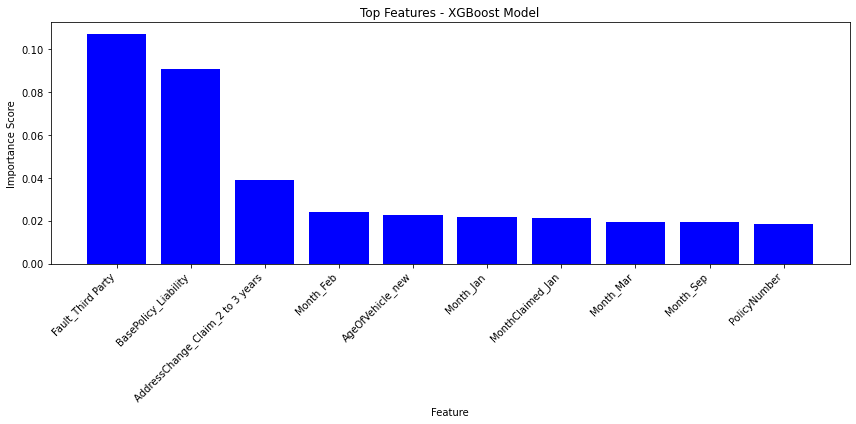

In [16]:
import matplotlib.pyplot as plt

# Plot the top features in a bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_features['Feature'], top_features['Importance'], color='blue')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Top Features - XGBoost Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## XGBoost with SMOTE
### Gave worse results. So we continue WITHOUT doing SMOTE oversampling for XGBoost

In [14]:

from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize XGBoost model without hyperparameter tuning
xgb_model_smote = xgb.XGBClassifier(random_state=42)

# Fit the model on the SMOTE-oversampled training set
xgb_model_smote.fit(X_train_smote, y_train_smote)

# Predictions on the testing set
y_pred_xgb_smote = xgb_model_smote.predict(X_test)
y_pred_proba_xgb_smote = xgb_model_smote.predict_proba(X_test)[:, 1]

# Calculate AUC score for the XGBoost model with SMOTE
auc_score_xgb_smote = roc_auc_score(y_test, y_pred_proba_xgb_smote)

# Display evaluation metrics for the XGBoost model with SMOTE
print("Accuracy with XGBoost and SMOTE:", accuracy_score(y_test, y_pred_xgb_smote))
print("AUC Score with XGBoost and SMOTE:", auc_score_xgb_smote)
print("Classification Report with XGBoost and SMOTE:")
print(classification_report(y_test, y_pred_xgb_smote))
print("Confusion Matrix with XGBoost and SMOTE:")
print(confusion_matrix(y_test, y_pred_xgb_smote))




D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:35] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy with XGBoost and SMOTE: 0.9471465629053177
AUC Score with XGBoost and SMOTE: 0.9571209289322518
Classification Report with XGBoost and SMOTE:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2887
           1       0.74      0.27      0.39       197

    accuracy                           0.95      3084
   macro avg       0.84      0.63      0.68      3084
weighted avg       0.94      0.95      0.94      3084

Confusion Matrix with XGBoost and SMOTE:
[[2868   19]
 [ 144   53]]


## Hyperparameter tuning of XGBoost.
### This will take you around 5-10 mins to execute depending on how powerful your computer is

In [17]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix

# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1)

# Perform grid search on the training set
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model from grid search
best_xgb_model = grid_search.best_estimator_

# Predictions on the testing set
y_pred_best_xgb = best_xgb_model.predict(X_test)

# Calculate AUC score for the best XGBoost model
y_pred_proba_best_xgb = best_xgb_model.predict_proba(X_test)[:, 1]
auc_score_best_xgb = roc_auc_score(y_test, y_pred_proba_best_xgb)

# Evaluate the best XGBoost model
accuracy_best_xgb = accuracy_score(y_test, y_pred_best_xgb)
classification_report_result_best_xgb = classification_report(y_test, y_pred_best_xgb)
conf_matrix_best_xgb = confusion_matrix(y_test, y_pred_best_xgb)

# Display evaluation metrics for the best XGBoost model
print("\nAccuracy with Best XGBoost Model:", accuracy_best_xgb)
print("AUC Score with Best XGBoost Model:", auc_score_best_xgb)
print("Classification Report with Best XGBoost Model:")
print(classification_report_result_best_xgb)
print("Confusion Matrix with Best XGBoost Model:")
print(conf_matrix_best_xgb)


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:59:29] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}

Accuracy with Best XGBoost Model: 0.9578469520103762
AUC Score with Best XGBoost Model: 0.9780180363927918
Classification Report with Best XGBoost Model:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2887
           1       0.83      0.43      0.56       197

    accuracy                           0.96      3084
   macro avg       0.90      0.71      0.77      3084
weighted avg       0.95      0.96      0.95      3084

Confusion Matrix with Best XGBoost Model:
[[2870   17]
 [ 113   84]]


#### We recieved just slight better results after hyperparameter tuning. Still its better so lets go ahead with the best model after hyperparameter tuning

#### Now lets adjust the threshold for highest TP value with minimum FN value without compromising much on the FP values

#### For your reference:

### Now lets start adjusting the threshold

## Best adjustment is at 0.1

In [39]:
# Best adjustment


# Adjust the threshold
new_threshold_more = 0.1# You can adjust this threshold based on your requirements
y_pred_proba_best_xgb_adj_more = (best_xgb_model.predict_proba(X_test)[:, 1] >= new_threshold_more).astype(int)

# Evaluate the adjusted XGBoost model with the new threshold
accuracy_best_xgb_adj_more = accuracy_score(y_test, y_pred_proba_best_xgb_adj_more)
classification_report_result_best_xgb_adj_more = classification_report(y_test, y_pred_proba_best_xgb_adj_more)
conf_matrix_best_xgb_adj_more = confusion_matrix(y_test, y_pred_proba_best_xgb_adj_more)
auc_score_best_xgb_adj_more = roc_auc_score(y_test, y_pred_proba_best_xgb_adj_more)

# Display evaluation metrics for the adjusted XGBoost model with the new threshold
print("\nAccuracy with Adjusted Threshold (More):", accuracy_best_xgb_adj_more)
print("AUC Score with Adjusted Threshold (More):", auc_score_best_xgb_adj_more)
print("Classification Report with Adjusted Threshold (More):")
print(classification_report_result_best_xgb_adj_more)
print("Confusion Matrix with Adjusted Threshold (More):")
print(conf_matrix_best_xgb_adj_more)



Accuracy with Adjusted Threshold (More): 0.9571984435797666
AUC Score with Adjusted Threshold (More): 0.9416656849626982
Classification Report with Adjusted Threshold (More):
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2887
           1       0.61      0.92      0.73       197

    accuracy                           0.96      3084
   macro avg       0.80      0.94      0.86      3084
weighted avg       0.97      0.96      0.96      3084

Confusion Matrix with Adjusted Threshold (More):
[[2770  117]
 [  15  182]]


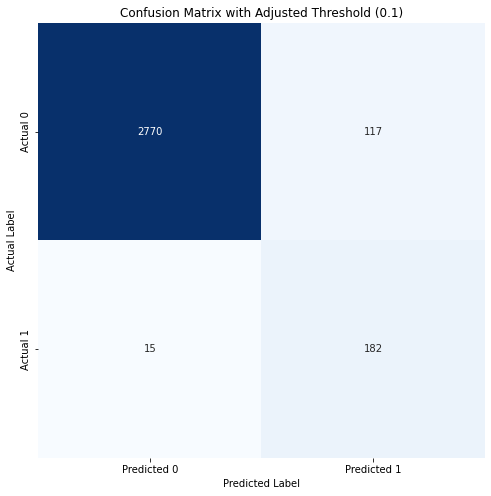

In [40]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Set the adjusted threshold
new_threshold_more = 0.1
y_pred_adj_more = (y_pred_proba_best_xgb_adj_more >= new_threshold_more).astype(int)

# Calculate confusion matrix
conf_matrix_adj_more = confusion_matrix(y_test, y_pred_adj_more)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix_adj_more, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title(f'Confusion Matrix with Adjusted Threshold ({new_threshold_more})')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()


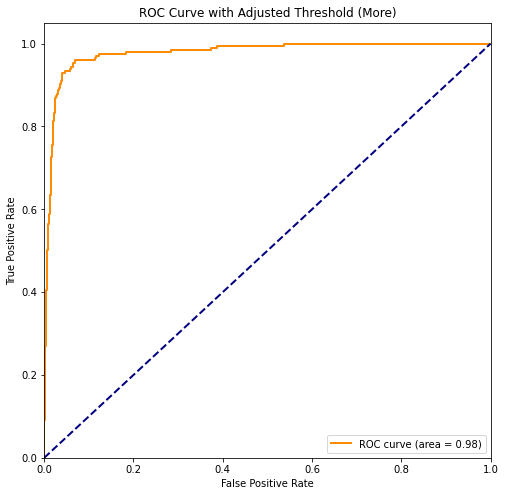

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for positive class
y_pred_proba_best_xgb_adj_more = best_xgb_model.predict_proba(X_test)[:, 1]

# Set the new threshold
new_threshold_more = 0.1
y_pred_adj_more = (y_pred_proba_best_xgb_adj_more >= new_threshold_more).astype(int)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_best_xgb_adj_more)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Adjusted Threshold (More)')
plt.legend(loc='lower right')
plt.show()


In [16]:
from sklearn.svm import SVC

# Initialize SVM model
svm_model = SVC(random_state=42, probability=True)

# Train the SVM model on the training set
svm_model.fit(X_train, y_train)

# Predictions on the testing set
y_pred_svm = svm_model.predict(X_test)

# Calculate AUC score for SVM model
y_pred_proba_svm = svm_model.predict_proba(X_test)[:, 1]
auc_score_svm = roc_auc_score(y_test, y_pred_proba_svm)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_report_result_svm = classification_report(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Display evaluation metrics for SVM model
print("Accuracy with SVM:", accuracy_svm)
print("\nAUC Score with SVM:", auc_score_svm)
print("\nClassification Report with SVM:")
print(classification_report_result_svm)
print("\nConfusion Matrix with SVM:")
print(conf_matrix_svm)


Accuracy with SVM: 0.9361219195849546

AUC Score with SVM: 0.501219364242649

Classification Report with SVM:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2887
           1       0.00      0.00      0.00       197

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.88      0.94      0.91      3084


Confusion Matrix with SVM:
[[2887    0]
 [ 197    0]]


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the Gradient Boosting model on the training set
gb_model.fit(X_train, y_train)

# Predictions on the testing set
y_pred_gb = gb_model.predict(X_test)

# Calculate AUC score for Gradient Boosting model
y_pred_proba_gb = gb_model.predict_proba(X_test)[:, 1]
auc_score_gb = roc_auc_score(y_test, y_pred_proba_gb)

# Evaluate the Gradient Boosting model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
classification_report_result_gb = classification_report(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

# Display evaluation metrics for Gradient Boosting model
print("Accuracy with Gradient Boosting:", accuracy_gb)
print("\nAUC Score with Gradient Boosting:", auc_score_gb)
print("\nClassification Report with Gradient Boosting:")
print(classification_report_result_gb)
print("\nConfusion Matrix with Gradient Boosting:")
print(conf_matrix_gb)



Accuracy with Gradient Boosting: 0.9393644617380026

AUC Score with Gradient Boosting: 0.89243132614433

Classification Report with Gradient Boosting:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2887
           1       1.00      0.05      0.10       197

    accuracy                           0.94      3084
   macro avg       0.97      0.53      0.53      3084
weighted avg       0.94      0.94      0.91      3084


Confusion Matrix with Gradient Boosting:
[[2887    0]
 [ 187   10]]


In [18]:

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

# Create an instance of SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training set
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize Gradient Boosting model
gb_model_smote = GradientBoostingClassifier(random_state=42)

# Train the model on the SMOTE training set
gb_model_smote.fit(X_train_smote, y_train_smote)

# Predictions on the testing set
y_pred_gb_smote = gb_model_smote.predict(X_test)

# Calculate AUC score for Gradient Boosting model with SMOTE
y_pred_proba_gb_smote = gb_model_smote.predict_proba(X_test)[:, 1]
auc_score_gb_smote = roc_auc_score(y_test, y_pred_proba_gb_smote)

# Evaluate the Gradient Boosting model with SMOTE
accuracy_gb_smote = accuracy_score(y_test, y_pred_gb_smote)
classification_report_result_gb_smote = classification_report(y_test, y_pred_gb_smote)
conf_matrix_gb_smote = confusion_matrix(y_test, y_pred_gb_smote)

# Display evaluation metrics for Gradient Boosting model with SMOTE
print("Accuracy with Gradient Boosting and SMOTE:", accuracy_gb_smote)
print("\nAUC Score with Gradient Boosting and SMOTE:", auc_score_gb_smote)
print("\nClassification Report with Gradient Boosting and SMOTE:")
print(classification_report_result_gb_smote)
print("\nConfusion Matrix with Gradient Boosting and SMOTE:")
print(conf_matrix_gb_smote)


Accuracy with Gradient Boosting and SMOTE: 0.9283398184176395

AUC Score with Gradient Boosting and SMOTE: 0.8068938476172727

Classification Report with Gradient Boosting and SMOTE:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      2887
           1       0.21      0.05      0.08       197

    accuracy                           0.93      3084
   macro avg       0.58      0.52      0.52      3084
weighted avg       0.89      0.93      0.91      3084


Confusion Matrix with Gradient Boosting and SMOTE:
[[2854   33]
 [ 188    9]]


In [21]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

# Split the original data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the resampled training set
rf_model.fit(X_train_resampled, y_train_resampled)

# Predictions on the testing set
y_pred_rf = rf_model.predict(X_test)

# Calculate AUC score for Random Forest model
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]
auc_score_rf = roc_auc_score(y_test, y_pred_proba_rf)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_result_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Display evaluation metrics for Random Forest model
print("Accuracy with Random Forest:", accuracy_rf)
print("\nAUC Score with Random Forest:", auc_score_rf)
print("\nClassification Report with Random Forest:")
print(classification_report_result_rf)
print("\nConfusion Matrix with Random Forest:")
print(conf_matrix_rf)



Accuracy with Random Forest: 0.9341763942931258

AUC Score with Random Forest: 0.8138847520567432

Classification Report with Random Forest:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2887
           1       0.00      0.00      0.00       197

    accuracy                           0.93      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.88      0.93      0.90      3084


Confusion Matrix with Random Forest:
[[2881    6]
 [ 197    0]]


In [24]:
import xgboost as xgb

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model on the training set
xgb_model.fit(X_train, y_train)

# Predictions on the testing set
y_pred_xgb = xgb_model.predict(X_test)

# Calculate AUC score for XGBoost model
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
auc_score_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
classification_report_result_xgb = classification_report(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Display evaluation metrics for XGBoost model
print("Accuracy with XGBoost:", accuracy_xgb)
print("\nAUC Score with XGBoost:", auc_score_xgb)
print("\nClassification Report with XGBoost:")
print(classification_report_result_xgb)
print("\nConfusion Matrix with XGBoost:")
print(conf_matrix_xgb)

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:53:03] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy with XGBoost: 0.958171206225681

AUC Score with XGBoost: 0.9760558006396608

Classification Report with XGBoost:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2887
           1       0.85      0.42      0.56       197

    accuracy                           0.96      3084
   macro avg       0.91      0.71      0.77      3084
weighted avg       0.95      0.96      0.95      3084


Confusion Matrix with XGBoost:
[[2873   14]
 [ 115   82]]
